In [1]:
%cd ..

/home/anatoly/Private/GitHub/renokan/study_ds/WeatherAUS-5


## Analysing the importance of the features

### 1. Importing the modules and setting parameters

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.utils import shuffle

import weather_project as we

In [3]:
print(we.ACTUAL_DATA)
print(we.FUTURE_DATA)
print(we.TARGET_NAME)

actual_data.csv
future_data.csv
RainTomorrow


In [4]:
%lf data/

-rw-rw-r-- 1 anatoly 12807959 июл 27 23:56 actual_data.csv
-rw-rw-r-- 1 anatoly  2793277 июл 27 23:56 future_data.csv
-rw-rw-r-- 1 anatoly    35935 авг  1 01:50 split_dataset.ipynb
-rw-rw-r-- 1 anatoly 14094055 дек 11  2020 weatherAUS.csv


### 2. Loading raw data, cleaning and splitting it

In [5]:
data = we.get_data(we.ACTUAL_DATA)

In [6]:
data

,Month,Region,MinTemp,MaxMin_Temp,Temp3pm,AmPm_Temp,Rainfall_YesNo,Sunshine_Clean,Sunshine_Types,WindDir3pm,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Pressure_Diff,Cloud_YesNo,RainToday,RainTomorrow
0,December,4,13.4,9.5,21.8,4.9,1.0,10.0,normal,WNW,44.0,24.0,71.0,22.0,1007.1,0.6,1,0.0,0.0
1,December,4,7.4,17.7,24.3,7.1,0.0,10.0,normal,WSW,44.0,22.0,44.0,25.0,1007.8,2.8,0,0.0,0.0
2,December,4,12.9,12.8,23.2,2.2,0.0,10.0,normal,WSW,46.0,26.0,38.0,30.0,1008.7,1.1,1,0.0,0.0
3,December,4,9.2,18.8,26.5,8.4,0.0,10.0,normal,E,24.0,9.0,45.0,16.0,1012.8,4.8,0,0.0,0.0
4,December,4,17.5,14.8,29.7,11.9,1.0,10.0,normal,NW,41.0,20.0,82.0,33.0,1006.0,4.8,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118898,December,1,20.5,14.2,33.0,8.7,0.0,10.0,normal,E,52.0,20.0,23.0,12.0,1010.1,3.1,0,0.0,0.0
118899,December,1,18.0,18.4,35.0,8.3,0.0,10.0,normal,ESE,54.0,31.0,17.0,7.0,1010.9,3.8,0,0.0,0.0
118900,December,1,17.5,19.6,34.7,6.6,0.0,10.0,normal,SE,56.0,22.0,12.0,7.0,1007.5,5.0,0,0.0,0.0
118901,December,1,20.0,18.9,38.4,7.1,0.0,10.0,normal,SSE,59.0,17.0,12.0,12.0,1002.6,4.6,1,0.0,0.0


In [7]:
data = we.get_notna_target(data, we.TARGET_NAME)

In [8]:
data.shape

(116219, 19)

In [9]:
train_data, test_data = we.get_train_test(data)

In [10]:
print(train_data.shape)
print(test_data.shape)

(29311, 18)
(86908, 18)


In [11]:
X_train, y_train = we.get_x_y_data(train_data, we.TARGET_NAME)
X_test, y_test = we.get_x_y_data(test_data, we.TARGET_NAME)

In [12]:
print(X_train.shape)
print(y_train.shape)

(29311, 17)
(29311,)


In [13]:
X_train

,Month,MinTemp,MaxMin_Temp,Temp3pm,AmPm_Temp,Rainfall_YesNo,Sunshine_Clean,Sunshine_Types,WindDir3pm,WindGustSpeed,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,Pressure_Diff,Cloud_YesNo,RainToday
12366,December,13.2,NaN,30.6,8.8,0.0,10.0,normal,NW,NaN,19.0,50.0,24.0,NaN,3.5,1,0.0
12367,December,NaN,NaN,25.4,NaN,0.0,10.0,normal,NE,NaN,19.0,NaN,59.0,NaN,3.5,0,0.0
12368,December,16.2,16.0,32.0,9.8,0.0,10.0,normal,SE,NaN,2.0,74.0,26.0,NaN,3.5,1,0.0
12369,December,19.2,4.8,23.0,2.6,0.0,10.0,normal,SE,NaN,22.0,66.0,61.0,NaN,3.5,1,0.0
12370,December,18.8,11.4,NaN,NaN,0.0,10.0,normal,NaN,NaN,NaN,85.0,NaN,NaN,3.5,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116826,December,23.4,7.6,29.8,5.6,1.0,1.1,small,W,69.0,30.0,94.0,77.0,1005.0,1.9,1,1.0
116827,December,24.2,7.5,31.3,5.1,1.0,5.5,normal,WNW,52.0,24.0,79.0,68.0,1006.8,2.9,1,0.0
116828,December,24.1,6.3,24.8,4.3,0.0,3.1,normal,SE,48.0,19.0,76.0,91.0,1007.4,1.4,1,0.0
116829,December,24.4,7.9,31.7,1.7,1.0,11.6,big,W,50.0,33.0,73.0,61.0,1005.9,1.4,1,1.0


### 3. Feature importances

In [14]:
features = we.get_3group_features(X_train)
print(*features, sep='\n')

['Rainfall_YesNo', 'Cloud_YesNo', 'RainToday']
['MinTemp', 'MaxMin_Temp', 'Temp3pm', 'AmPm_Temp', 'Sunshine_Clean', 'WindGustSpeed', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Pressure_Diff']
['Month', 'Sunshine_Types', 'WindDir3pm']


### 3.1. DecisionTreeClassifier

In [15]:
model_type = "tree"
estimator = we.get_estimator(model_type, features, scaling='skip', encoding='ordinal')
param_grid = we.get_param_grid(model_type)
gs = we.get_search(estimator, param_grid)

In [16]:
estimator

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('bin',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Rainfall_YesNo',
                                                   'Cloud_YesNo',
                                                   'RainToday']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outlier',
                                                                   OutliersTrim(strategy='border'))]),
                                                  ['MinTemp', 'MaxMin_Temp',
                           

In [17]:
gs.set_params(verbose=1);

In [18]:
param_grid['tree__max_depth'] = [10]

In [19]:
%%time
gs.fit(X_train, y_train)
print()
print(gs.best_params_)
print(gs.best_score_)
print()

Fitting 3 folds for each of 16 candidates, totalling 48 fits

{'preprocess__num__outlier__strategy': 'border', 'tree__criterion': 'gini', 'tree__max_depth': 10, 'tree__min_samples_leaf': 10, 'tree__min_samples_split': 10}
0.5716328107598857

CPU times: user 11.4 s, sys: 37.7 ms, total: 11.4 s
Wall time: 11.5 s


In [20]:
%%time
gs.score(X_train, y_train)

CPU times: user 97.5 ms, sys: 3.32 ms, total: 101 ms
Wall time: 131 ms


0.6470965672120629

In [21]:
%%time
gs.score(X_test, y_test)

CPU times: user 343 ms, sys: 28.2 ms, total: 371 ms
Wall time: 399 ms


0.5722950590211356

In [22]:
importances = gs.best_estimator_['tree'].feature_importances_
transformer = gs.best_estimator_['preprocess'].transformers_

features_stats = importances.tolist()
features_names = [j for i in transformer for j in i[2]]

feature_importances = pd.DataFrame(index=features_names,
                                   data=features_stats,
                                   columns=['importances'])

In [23]:
feature_importances.sort_values(by='importances', ascending=False)

,importances
Humidity3pm,0.450677
Sunshine_Clean,0.196162
WindGustSpeed,0.089152
Pressure3pm,0.072500
Temp3pm,0.031742
Humidity9am,0.029702
MinTemp,0.028960
Pressure_Diff,0.028772
MaxMin_Temp,0.017517
WindDir3pm,0.014348


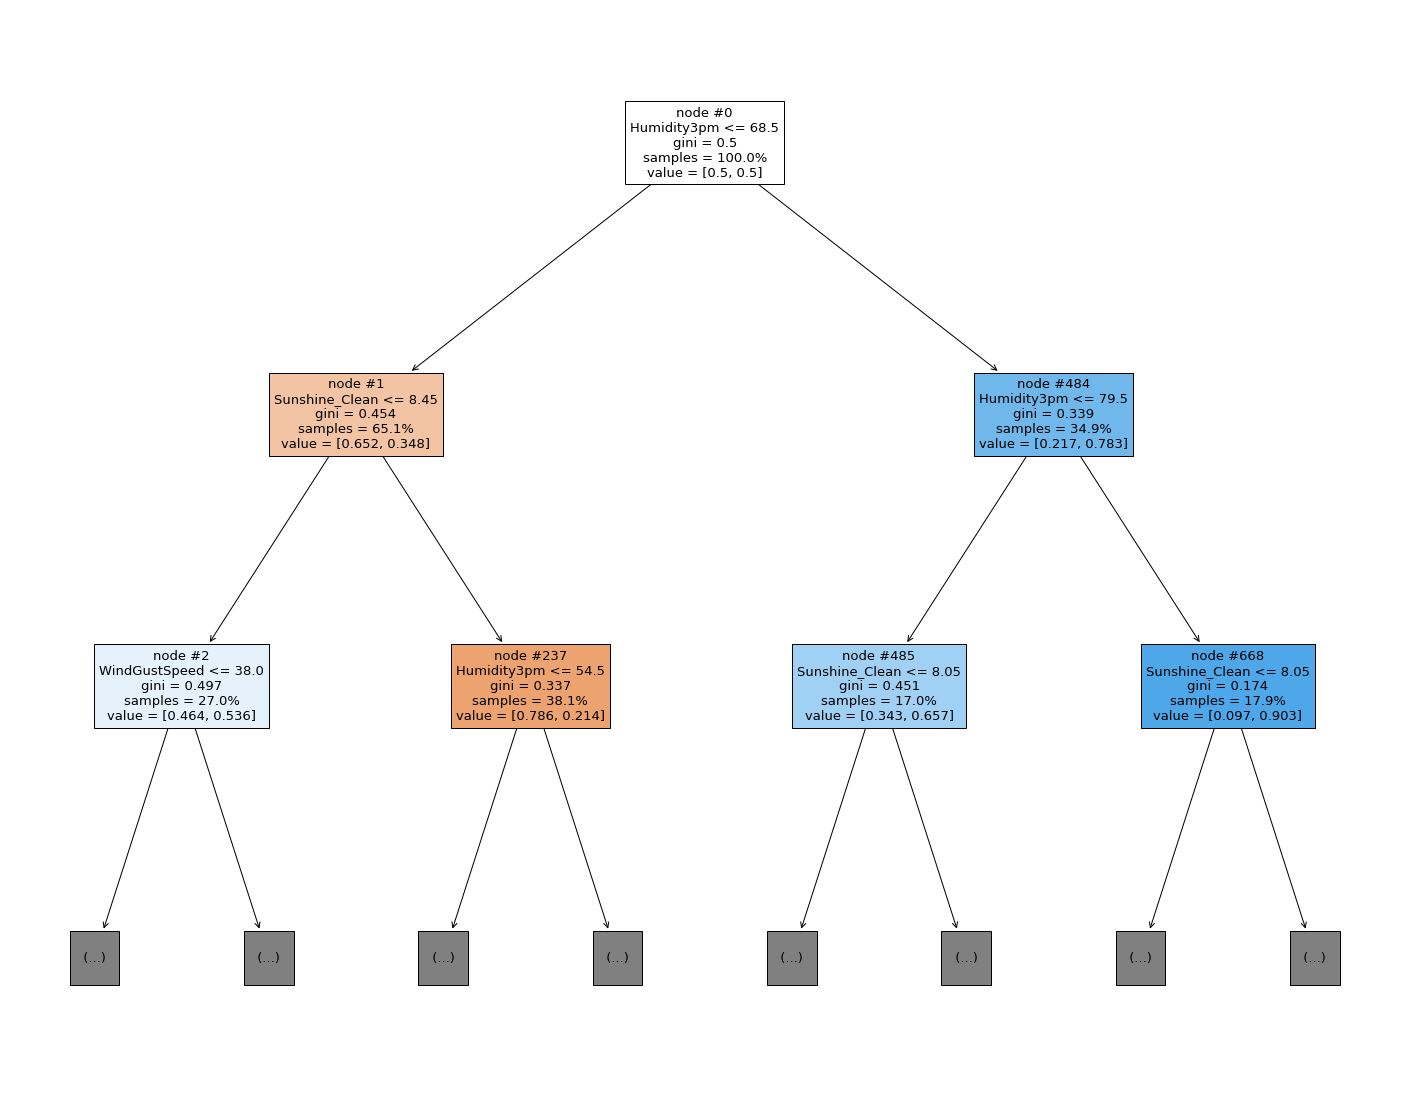

In [24]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(gs.best_estimator_['tree'], proportion=True,
                   feature_names=features_names, max_depth=2, node_ids=True,
                   filled=True)

In [25]:
tree_text = tree.export_text(gs.best_estimator_['tree'], show_weights=True,
                             feature_names=features_names)
print(tree_text[:3000])

|--- Humidity3pm <= 68.50
|   |--- Sunshine_Clean <= 8.45
|   |   |--- WindGustSpeed <= 38.00
|   |   |   |--- Pressure3pm <= 1017.15
|   |   |   |   |--- Humidity3pm <= 60.50
|   |   |   |   |   |--- Pressure3pm <= 1003.25
|   |   |   |   |   |   |--- weights: [2.00, 12.00] class: 1.0
|   |   |   |   |   |--- Pressure3pm >  1003.25
|   |   |   |   |   |   |--- WindDir3pm <= 5.50
|   |   |   |   |   |   |   |--- Pressure3pm <= 1016.15
|   |   |   |   |   |   |   |   |--- Month <= 8.50
|   |   |   |   |   |   |   |   |   |--- Temp3pm <= 20.20
|   |   |   |   |   |   |   |   |   |   |--- weights: [13.00, 4.00] class: 0.0
|   |   |   |   |   |   |   |   |   |--- Temp3pm >  20.20
|   |   |   |   |   |   |   |   |   |   |--- weights: [29.00, 35.00] class: 1.0
|   |   |   |   |   |   |   |   |--- Month >  8.50
|   |   |   |   |   |   |   |   |   |--- Sunshine_Clean <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 11.00] class: 1.0
|   |   |   |   |   |   |   |   |   |--- 

### 3.2. LogisticRegression

In [26]:
model_type_2 = "logreg"
estimator_2 = we.get_estimator(model_type_2, features)
param_grid_2 = we.get_param_grid(model_type_2)
gs_2 = we.get_search(estimator_2, param_grid_2)

In [27]:
gs_2.set_params(verbose=1);

In [28]:
%%time
gs_2.fit(X_train, y_train)
print()
print(gs_2.best_params_)
print(gs_2.best_score_)
print()

Fitting 3 folds for each of 5 candidates, totalling 15 fits

{'logreg__C': 0.1}
0.6102652375892398

CPU times: user 11.3 s, sys: 264 ms, total: 11.6 s
Wall time: 6.19 s


In [29]:
%%time
gs_2.score(X_train, y_train)

CPU times: user 246 ms, sys: 7.3 ms, total: 254 ms
Wall time: 243 ms


0.6173430529866174

In [30]:
%%time
gs_2.score(X_test, y_test)

CPU times: user 434 ms, sys: 100 ms, total: 534 ms
Wall time: 496 ms


0.6223329468932686

In [31]:
diff_score = []

for x_column in X_test.columns:
    X_shuffle = X_test.copy()
    X_shuffle[x_column] = shuffle(X_shuffle[x_column].values, random_state=42)
    
    diff_score.append(round(gs_2.score(X_test, y_test) - gs_2.score(X_shuffle, y_test), 4))

In [32]:
feature_importances_2 = pd.DataFrame(index=X_test.columns,
                                     data=diff_score,
                                     columns=['importances'])

In [33]:
feature_importances_2

,importances
Month,0.0009
MinTemp,0.0006
MaxMin_Temp,-0.0007
Temp3pm,0.0084
AmPm_Temp,0.0037
Rainfall_YesNo,-0.0005
Sunshine_Clean,0.0741
Sunshine_Types,0.0121
WindDir3pm,0.0008
WindGustSpeed,0.0521
